# IS709 Assignment 4

### Due: January 10, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_4.ipynb (e.g., “e123456_HW_4.ipynb”).
- Late submissions will be accepted by January 13, 2021, 23:59 with a 5% per day penalty.
<!-- - Do not change variable names in the code blocks and the texts in the markdowns. -->
- **This is an individual assignment. You have to adhere to the academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.    

## Questions

### Clustering Part

There are two datasets for the clustering part. They are data_cls_1.csv and data_cls_2.csv.     
You need to answer the below questions for each dataset. (You are going to use true labels files in Q2)



**Q1.**     
**a.** Generate  k-means models for k= 2, 3, 4, 5, 6, 7, 8, 9, and 10.    
Determine the optimal value of k by looking at **wss graph** and **silhouette scores**.      
    
**b.** Plot the clusters for the optimal value of k.    
<font color=#C91414> Hint: Please use principal component analysis for 2D plotting since the number of attributes is greater than 2.</font>      
     
     
  
**Q2.**    
**a.** Generate  DBSCAN models for epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10 and for min_samples=5, 10, 15 and 20.   
Find the optimal value of k by **adjusted rand scores**. (While calculating adjusted rand scores you will need true labels. Please see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)    
     
**b.** Plot the clusters for the optimal value of k.  
<font color=#C91414> Hint: Please use principal component analysis for 2D plotting since the number of attributes is greater than 2.</font>    
  
**Q3.** Did you obtain the same optimal k values in Q1 and Q2? Comment on the quality of the clusters that you obtained in Q1 and Q2. Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?





## Q1.    
**a.** Generate  k-means models for k= 2, 3, 4, 5, 6, 7, 8, 9, and 10.    
Determine the optimal value of k by looking at **wss graph** and **silhouette scores**. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.cm as cm

In [2]:
data_cls_1=pd.read_csv("data_cls_1.csv")
data_cls_2=pd.read_csv("data_cls_2.csv")
true_label_cls1=pd.read_csv("true_label_cls1.csv")
true_label_cls2=pd.read_csv("true_label_cls2.csv")

For performing the clustering task, if there are any missing values in the data set, they must be removed or estimated. Please look at the below output; there are no missing values in data_cls_1 and data_cls_2 datasets.

In [3]:
#data_cls_1
for columns in data_cls_1:
    print(columns,"--> # of missing value", data_cls_1[columns].isna().sum())

x1 --> # of missing value 0
x2 --> # of missing value 0
x3 --> # of missing value 0
x4 --> # of missing value 0
x5 --> # of missing value 0
x6 --> # of missing value 0
x7 --> # of missing value 0
x8 --> # of missing value 0
x9 --> # of missing value 0
x10 --> # of missing value 0
x11 --> # of missing value 0


In [4]:
#data_cls_2
for columns in data_cls_2:
    print(columns,"--> # of missing value", data_cls_2[columns].isna().sum())

x1 --> # of missing value 0
x2 --> # of missing value 0


Kmeans use distance-based measurements to determine the similarity between data points. Therefore, it is recommended to standardize the data to have a mean of 0 and a standard deviation of 1.

In [5]:
#data_cls_1
standardscaler= StandardScaler()
scaled_data_cls_1=standardscaler.fit_transform(data_cls_1)
scaled_data_cls_1=pd.DataFrame(scaled_data_cls_1, columns=data_cls_1.columns)
scaled_data_cls_1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,-0.595470,-1.343787,-0.597243,1.389894,0.317690,-0.461951,0.951956,-0.906677,1.201774,-0.880882,-0.922459
1,0.914513,0.179274,0.563102,-0.121377,-2.278410,1.456387,-0.359526,-1.624609,-0.979690,-1.087471,2.250523
2,-0.913310,-1.291912,-0.563299,1.129220,1.257668,0.000526,1.570518,-1.131471,0.005079,-0.631096,-0.057193
3,0.973015,0.234219,-0.595442,-1.480454,0.695342,0.079725,0.392252,0.390736,-1.653897,0.566803,-0.298091
4,-1.390698,-1.550978,-0.390084,1.089938,0.607031,0.041922,0.452285,-0.822862,1.296866,-0.675007,-0.454332


In [6]:
#data_cls_2
standardscaler= StandardScaler()
scaled_data_cls_2=standardscaler.fit_transform(data_cls_2)
scaled_data_cls_2=pd.DataFrame(scaled_data_cls_2, columns=data_cls_2.columns)
scaled_data_cls_2.head()

,x1,x2
0,-0.093835,-0.975885
1,-0.002140,-0.968491
2,-0.111054,-0.872960
3,-0.158745,-0.976482
4,-0.108254,-0.958324


## <span style="background-color:#A2CBE4">Within Sum of Squares(WSS) - Elbow Method For Optimal k </span>
The total within-cluster sum of squares (WSS) measures the compactness of the clustering and we want it to be as small as possible. The optimal number of clusters can be determined by looking at where the elbow/bend in the knee occurs. According to this, by looking at the within-cluster sum of square (WSS), it can be said that the optimal number of clusters is 4 because the bend in the knee occurs there. Please see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

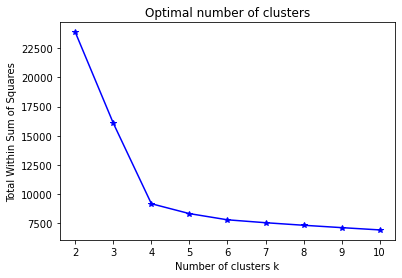

In [7]:
#data_cls_1
wss = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans = kmeans.fit(scaled_data_cls_1)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

## inertia_: Sum of squared distances of samples to their closest cluster center.

**Comment:** While total wss decreases significantly until k = 4, the rate of reduction of total wss decreases significantly after k = 4. Therefore, optimum k value is 4 regarding Elbow method.

## <span style="background-color:#A2CBE4"> Average Silhouette Approach </span>      
The average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k. According to this, by looking at the silhouete graph, it can be said that the optimal number of k is 4.

n_clusters = 2 The average silhouette_score is : 0.3030
n_clusters = 3 The average silhouette_score is : 0.4125
n_clusters = 4 The average silhouette_score is : 0.5191
n_clusters = 5 The average silhouette_score is : 0.4800
n_clusters = 6 The average silhouette_score is : 0.4094
n_clusters = 7 The average silhouette_score is : 0.3946
n_clusters = 8 The average silhouette_score is : 0.3922
n_clusters = 9 The average silhouette_score is : 0.2706
n_clusters = 10 The average silhouette_score is : 0.2607


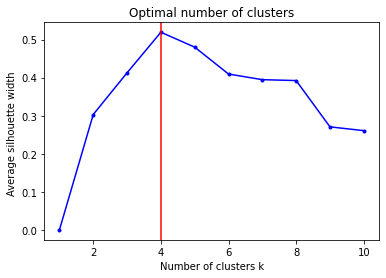

In [8]:
#data_cls_1
sil_avg = [0]
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(scaled_data_cls_1)
    silhouette_avg = silhouette_score(scaled_data_cls_1, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)


plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show()

**Comment:** Since k=4 has the largest average silhouette score, the optimal k value is 4.

Thus, optimal value of k is 4 in data_cls_1 according to both **wss graph** and **silhouette scores**.

## <span style="background-color:#A2CBE4">Within Sum of Squares(WSS) - Elbow Method For Optimal k </span>
The total within-cluster sum of squares (WSS) measures the compactness of the clustering and we want it to be as small as possible. The optimal number of clusters can be determined by looking at where the elbow/bend in the knee occurs. According to this, by looking at the within-cluster sum of square (WSS), it can be said that the optimal number of clusters might be 2 because the bend in the knee occurs there. Please see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

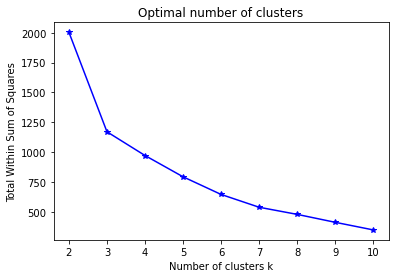

In [9]:
#data_cls_2
wss = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans = kmeans.fit(scaled_data_cls_2)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

## inertia_: Sum of squared distances of samples to their closest cluster center.

**Comment:** While total wss decreases significantly until k = 2, the rate of reduction of total wss decreases significantly after k = 2. Therefore, optimum k value is 2 regarding Elbow method.

## <span style="background-color:#A2CBE4"> Average Silhouette Approach </span>      
The average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k. According to this, by looking at the silhouete graph, it can be said that the optimal number of k is 2.

n_clusters = 2 The average silhouette_score is : 0.5413
n_clusters = 3 The average silhouette_score is : 0.5154
n_clusters = 4 The average silhouette_score is : 0.4481
n_clusters = 5 The average silhouette_score is : 0.3683
n_clusters = 6 The average silhouette_score is : 0.3989
n_clusters = 7 The average silhouette_score is : 0.3949
n_clusters = 8 The average silhouette_score is : 0.4081
n_clusters = 9 The average silhouette_score is : 0.4488
n_clusters = 10 The average silhouette_score is : 0.4700


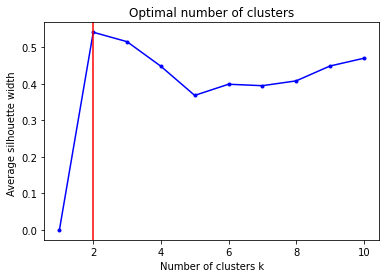

In [10]:
#data_cls_2
sil_avg = [0]
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(scaled_data_cls_2) ###same with>> cluster_labels=kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data_cls_2, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)


plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show()

Thus, optimal value of k is 2 in data_cls_2 according to **wss graph** and optimal value of k is 2 in data_cls_2 according to **silhouette scores**. From now on, we will use k=2 for optimum k value in data_cls_2 since k=2 is optimal for both wss graph and silhouette score.

## Q1.    
**b.** Plot the clusters for the optimal value of k.    
<font color=#C91414> Hint: Please use principal component analysis for 2D plotting since the number of attributes is greater than 2.</font> 

## The simple visualization of the clustered data for the Optimal Value of k

**data_cls_1:** Since data_cls_1 has 11 features, the visualization in 2D is impossible. Therefore, observations are represented by points in the plot by using principal components (if ncol(data) > 2)

In [11]:
#data_cls_1
pca = PCA()
pca_data_cls_1 = pca.fit_transform(scaled_data_cls_1)
pca_data_cls_1 = pd.DataFrame(pca_data_cls_1, columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11"])
print("pca.explained variance ratio:\n", pca.explained_variance_ratio_)

pca.explained variance ratio:
 [0.32468437 0.25937646 0.2001569  0.07805631 0.03746549 0.02354879
 0.02016181 0.01797674 0.01468643 0.01282296 0.01106372]


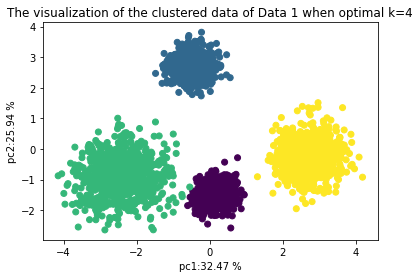

In [12]:
#Plot the clusters for the optimal value of k=4.  
#data_cls_1
kmeans = KMeans(n_clusters=4, random_state=23)
df_cls_1=pca_data_cls_1[["pc1","pc2"]].copy()
df_cls_1["clusters"]=kmeans.fit_predict(scaled_data_cls_1)
plt.scatter(df_cls_1["pc1"], df_cls_1["pc2"],c=df_cls_1.clusters)
plt.title("The visualization of the clustered data of Data 1 when optimal k=4")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

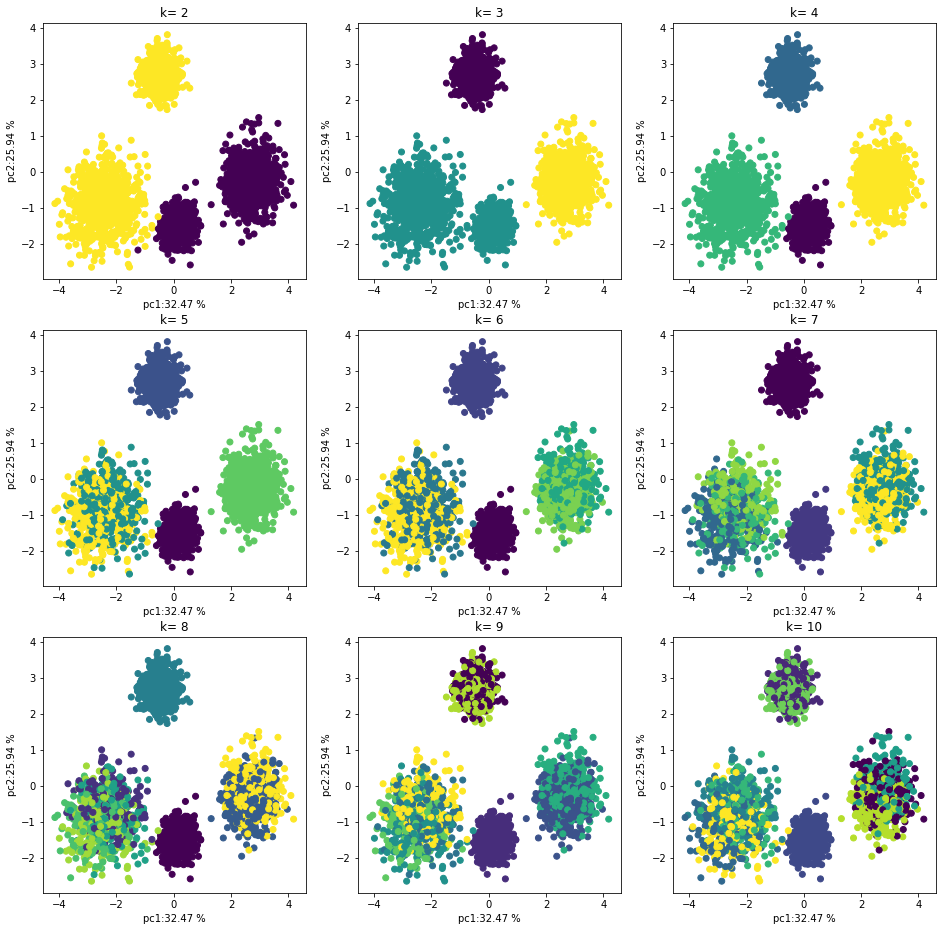

In [13]:
##Plot the clusters for the different values of k.
#data_cls_1
rows=3
columns=3
f, axes = plt.subplots(rows,columns, figsize=(16, 16))
k=2
for i in range(rows):
    for j in range(columns):
        kmeans = KMeans(n_clusters=k, random_state=23)
        df_cls_1=pca_data_cls_1[["pc1","pc2"]].copy()
        df_cls_1["clusters"]=kmeans.fit_predict(scaled_data_cls_1)
        axes[i,j].scatter(df_cls_1["pc1"], df_cls_1["pc2"],c=df_cls_1.clusters)      
        axes[i,j].set_title( "k= " +str(k) )
        axes[i,j].set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
        axes[i,j].set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
        k=k+1   

**Comment:**
When k = 4, it is understood from the graph that the optimum k value is 4, since the clusters are best separated from each other. When k<4, clusters that should be separate appear together. When k>4, clusters that should be together  are displayed separately.

**data_cls_2:** Since data_cls_2 has 2 features, the visualization in 2D is possible. Therefore, we can plot by using 2 features directly.

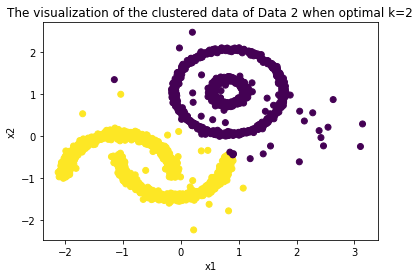

In [14]:
#Plot the clusters for the optimal value of k=2.  
#data_cls_2
kmeans = KMeans(n_clusters=2, random_state=23)
df_cls_2=scaled_data_cls_2[["x1","x2"]].copy()
df_cls_2["clusters"]=kmeans.fit_predict(scaled_data_cls_2)
plt.scatter(df_cls_2["x1"], df_cls_2["x2"],c=df_cls_2.clusters)
plt.title("The visualization of the clustered data of Data 2 when optimal k=2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

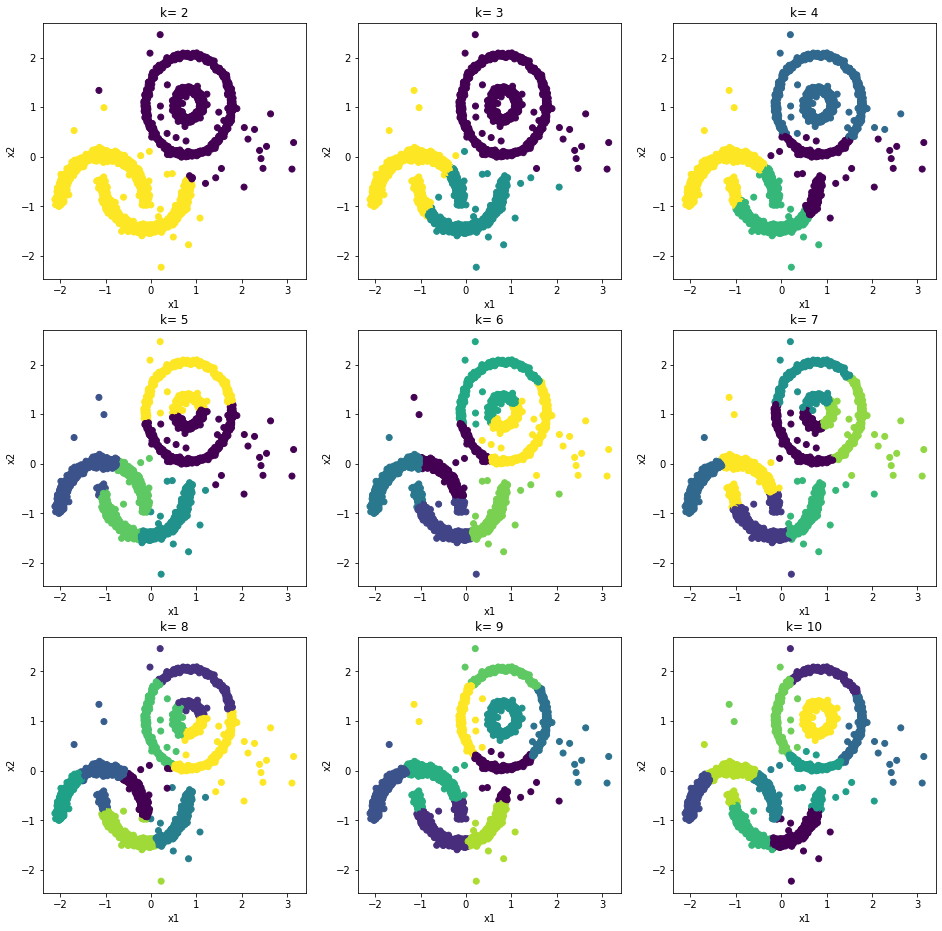

In [15]:
##Plot the clusters for the different values of k.
#data_cls_2
rows=3
columns=3
f, axes = plt.subplots(rows,columns, figsize=(16, 16))
k=2
for i in range(rows):
    for j in range(columns):
        kmeans = KMeans(n_clusters=k, random_state=23)
        df_cls_2=scaled_data_cls_2[["x1","x2"]].copy()
        df_cls_2["clusters"]=kmeans.fit_predict(scaled_data_cls_2)
        axes[i,j].scatter(df_cls_2["x1"], df_cls_2["x2"],c=df_cls_2.clusters)      
        axes[i,j].set_title( "k= " +str(k) )
        axes[i,j].set_xlabel("x1")
        axes[i,j].set_ylabel("x2")
        k=k+1 

**Comment:**
By looking at the graphs, the main clusters look like two rounds(big and small) and two arbitrary shapes(like semicircles).The clusters can be represented in the best way when k=2. When k=3, clustering is not good comparing to k=2 regarding arbitrary shapes(semicircle).

## Q2   
**a.** Generate  DBSCAN models for epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10 and for min_samples=5, 10, 15 and 20.   
Find the optimal value of k by **adjusted rand scores**. (While calculating adjusted rand scores you will need true labels. Please see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)

## DBSAN

In [16]:
#data_cls_1
for min_samp in range(5,25,5):
    for eps in range(1, 26):
        x = eps/10
        dbscan = DBSCAN(eps=x, min_samples=min_samp)
        cluster_labels=dbscan.fit_predict(scaled_data_cls_1)
        true_label_cls1_array_1d=true_label_cls1.to_numpy().flatten()
        adj_rand_score = adjusted_rand_score(true_label_cls1_array_1d, cluster_labels)
        print("eps =", x,"min_samples =", min_samp, "adjusted_rand_score is : %.4f" % adj_rand_score)
        
        

eps = 0.1 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 0.2 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 0.3 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 0.4 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 0.5 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 0.6 min_samples = 5 adjusted_rand_score is : 0.0081
eps = 0.7 min_samples = 5 adjusted_rand_score is : 0.1229
eps = 0.8 min_samples = 5 adjusted_rand_score is : 0.3789
eps = 0.9 min_samples = 5 adjusted_rand_score is : 0.5772
eps = 1.0 min_samples = 5 adjusted_rand_score is : 0.6590
eps = 1.1 min_samples = 5 adjusted_rand_score is : 0.7031
eps = 1.2 min_samples = 5 adjusted_rand_score is : 0.7724
eps = 1.3 min_samples = 5 adjusted_rand_score is : 0.8159
eps = 1.4 min_samples = 5 adjusted_rand_score is : 0.8466
eps = 1.5 min_samples = 5 adjusted_rand_score is : 0.8813
eps = 1.6 min_samples = 5 adjusted_rand_score is : 0.9212
eps = 1.7 min_samples = 5 adjusted_rand_score is : 0.9490
eps = 1.8 min_

Maximum value of adjusted rank score is 0.9895 when eps=2 and min_samples=5. Therefore, optimal value of eps is 2 and optimal value of min_samples is 5.

In [17]:
#data_cls_2
for min_samp in range(5,25,5):
    for eps in range(1, 26):
        x = eps/10
        dbscan = DBSCAN(eps=x, min_samples=min_samp)
        cluster_labels=dbscan.fit_predict(scaled_data_cls_2)
        true_label_cls2_array_1d=true_label_cls2.to_numpy().flatten()
        adj_rand_score = adjusted_rand_score(true_label_cls2_array_1d, cluster_labels)
        print("eps =", x,"min_samples =", min_samp, "adjusted_rand_score is : %.4f" % adj_rand_score) 


eps = 0.1 min_samples = 5 adjusted_rand_score is : 0.9842
eps = 0.2 min_samples = 5 adjusted_rand_score is : 0.9821
eps = 0.3 min_samples = 5 adjusted_rand_score is : 0.0114
eps = 0.4 min_samples = 5 adjusted_rand_score is : 0.0065
eps = 0.5 min_samples = 5 adjusted_rand_score is : 0.0032
eps = 0.6 min_samples = 5 adjusted_rand_score is : 0.0023
eps = 0.7 min_samples = 5 adjusted_rand_score is : 0.0009
eps = 0.8 min_samples = 5 adjusted_rand_score is : 0.0009
eps = 0.9 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.0 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.1 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.2 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.3 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.4 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.5 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.6 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.7 min_samples = 5 adjusted_rand_score is : 0.0000
eps = 1.8 min_

Maximum value of adjusted rank score is 0.9842 when eps=0.1 and min_samples=5 or 10. Therefore, optimal value of eps is 0.1 and optimal value of min_samples is 5 or 10.For plotting, we will select optimal value of min_samples=5.

## Q2.    
**b.** Plot the clusters for the optimal value of k.    
<font color=#C91414> Hint: Please use principal component analysis for 2D plotting since the number of attributes is greater than 2.</font> 

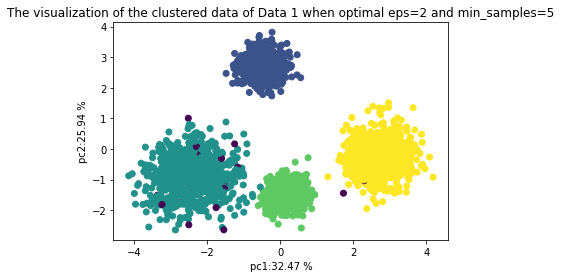

In [18]:
#Plot the clusters for the optimal value of eps=2 and min_samples=5.  
#data_cls_1
dbscan = DBSCAN(eps=2, min_samples=5)
df_cls_1_dbscan=pca_data_cls_1[["pc1","pc2"]].copy()
df_cls_1_dbscan["clusters"]=dbscan.fit_predict(scaled_data_cls_1)
plt.scatter(df_cls_1_dbscan["pc1"], df_cls_1_dbscan["pc2"],c=df_cls_1_dbscan.clusters)
plt.title("The visualization of the clustered data of Data 1 when optimal eps=2 and min_samples=5")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

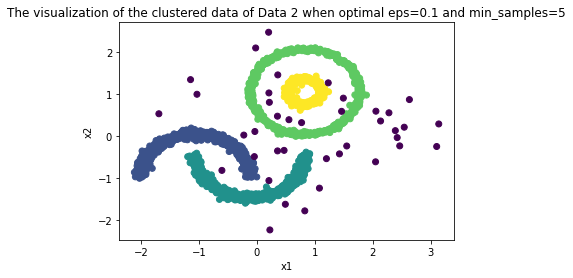

In [19]:
#Plot the clusters for the optimal value of eps=0.1 and min_samples=5.  
#data_cls_2
dbscan = DBSCAN(eps=0.1, min_samples=5)
df_cls_2_dbscan=scaled_data_cls_2[["x1","x2"]].copy()
df_cls_2_dbscan["clusters"]=dbscan.fit_predict(scaled_data_cls_2)
plt.scatter(df_cls_2_dbscan["x1"], df_cls_2_dbscan["x2"],c=df_cls_2_dbscan.clusters)
plt.title("The visualization of the clustered data of Data 2 when optimal eps=0.1 and min_samples=5")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## **Q3.** 
Did you obtain the same optimal k values in Q1 and Q2? Comment on the quality of the clusters that you obtained in Q1 and Q2. Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?

Optimal values for different parameters can be seen as follows:

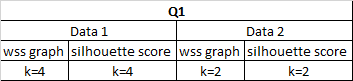

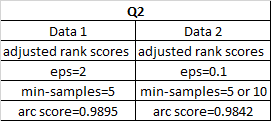

By considering Q1, optimal k values for Data 1 and Data 2 are different. Optimal k value is 4 regarding wss graph and silhoutte score in Data 1. On the other hand, optimal k value is 2 regarding wss graph and silhoutte score in Data 2. By considering Q2, optimal eps values for Data 1 and Data 2 are different. Optimal eps value is 2 regarding adjusted rank scores in Data 1. On the other hand, Optimal eps value is 0.1 regarding adjusted rank scores in Data 2. Optimal min_sample is 5 in Data 1 and optimal min_sample is 5 or 10 in Data 2.

By considering silhoutte graph below for Data 1, silhoutte scores of purple and red ones are lower than average silhoutte score that shows bad clustering. Also, at some points, red one has negative silhoutte score indicating wrong clustering. By the help of this information, red one may belong to green one in graph of the clustered data of Data 1 when optimal k=4 and purple one belong to purple one in graph of the clustered data of Data 1 when optimal k=4. Also, purple and red ones in silhoutte graph shows wide fluctuations showing bad clustering. On the other hand, grey and blue ones in silhoutte graph shows good clustering since they have no wide fluctuations and their silhoutte score is higher than average silhoutte score. By considering silhoutte graph below for Data 2, two clusters(grey and blue) have higher silhoutte score than average silhoutte score and they have no wide fluctuations that shows good clustering.

By considering k-means and Data 1, k-means can provide good clustering for Data 1 since k-means tends to produce more or less round clusters and Data 1 has 4 main round clusters. However, by considering k-means and Data 2, k-means cannot provide good clustering comparing to Data 1. When it comes to arbitrary shaped clusters or concentric circles, k-means is not good enough as k-means tends to produce more or less round clusters. Therefore, concentric circles cannot be separated from each other by using k-means and arbitrary shaped clusters cannot separated from each other strictly.

By considering DBSCAN and Data 1, DBSCAN can provide good clustering for Data 1. When it comes to detecting outliers, density-based techniques are more efficient. As DBSCAN is a density-based method, it detects outliers(purple ones) that k-means does not detect. Moreover, by considering DBSCAN and Data 2, DBSCAN can provide good clustering for Data 2. When it comes to arbitrary shaped clusters and concentic circles, density-based techniques are more efficient. DBSCAN detects concentric circles and it separetes from each other effectively. Also, It detects different types of artbitrary shaped(semicircle) clusters and it separetes from each other effectively. Lastly, DBSCAN detects outliers(purple ones). Thus, DBSCAN provides quality of clustering regarding discovery of clusters with arbitrary shape and ability to deal with noisy data.

Due to ability to detect outliers, ability to differentiate arbitrary shapes and concentric circles, DBSCAN algorithm gave a better result for Data 2. Also, both DBSCAN and k-means gave a good result for Data 1 due to round shaped clusters. I think both methods can be selected for clustering in Data 1, but k-means has a bit better differentiation regarding clusters such that although some points lies within cluster(light blue cluster), DBSCAN can detect these points as outliers and it affects the differentiation badly.

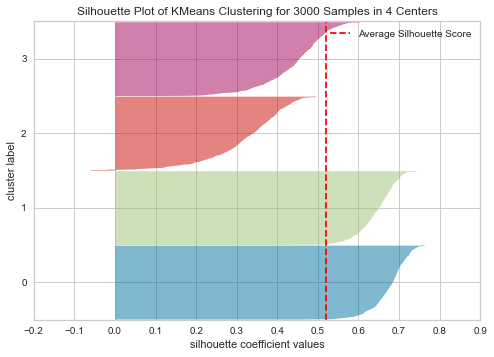

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
#Plot average silhouette score when optimal k=4
#data_cls_1
kmeans = KMeans(n_clusters=4, random_state=23)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data_cls_1)
visualizer.show()

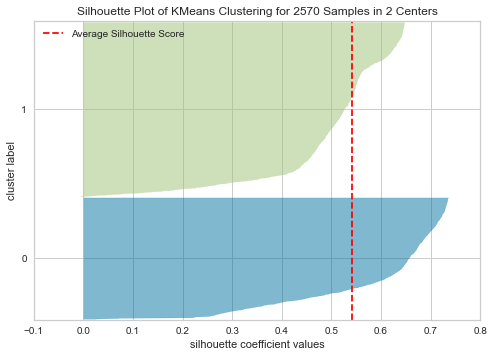

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2570 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
#Plot average silhouette score when optimal k=2
#data_cls_2
kmeans = KMeans(n_clusters=2, random_state=23)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data_cls_2)
visualizer.show()